In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tifffile as tf

import sys
sys.path.append( "../2PanalysisUtils" )
#sys.path.append("/home/mursel/DriveNYU/2PanalysisUtils")
import plotconfig as pconf
import matread as mread
import funx_mk as mk
import pandas as pd
import seaborn as sns
import math

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import matplotlib.colors as mlcolors
import matplotlib.cbook as cbook
from matplotlib import cm
%config InlineBackend.figure_format = 'svg'

IMAGES_PATH = Path() / "ResultImgs"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
from roifile import ImagejRoi
Pat_Masks, Maskcenter = mk.create_mask('1955/210722/newstim/SC1955_210722_newstimtest_RoiSet.zip')

In [6]:
Pat1 = tf.imread('1955/210722/newstim/SC1955_210722_newstimtest1_avg.tif')
Pat1_baseline = np.mean(Pat1[13:43,:,:],axis=0)
Pat1_avg = np.mean(Pat1[46:60,:,:],axis=0)

Pat2 = tf.imread('1955/210722/newstim/SC1955_210722_newstimtest2_avg.tif')
Pat2_baseline = np.mean(Pat2[13:43,:,:],axis=0)
Pat2_avg = np.mean(Pat2[46:60,:,:],axis=0)

Pat3 = tf.imread('1955/210722/newstim/SC1955_210722_newstimtest3_avg.tif')
Pat3_baseline = np.mean(Pat3[13:43,:,:],axis=0)
Pat3_avg = np.mean(Pat3[46:60,:,:],axis=0)

Pat4 = tf.imread('1955/210722/newstim/SC1955_210722_newstimtest4_avg.tif')
Pat4_baseline = np.mean(Pat4[13:43,:,:],axis=0)
Pat4_avg = np.mean(Pat4[46:60,:,:],axis=0)

In [17]:
np.shape(Pat_Masks)

(512, 512, 19)

NameError: name 'maskim' is not defined

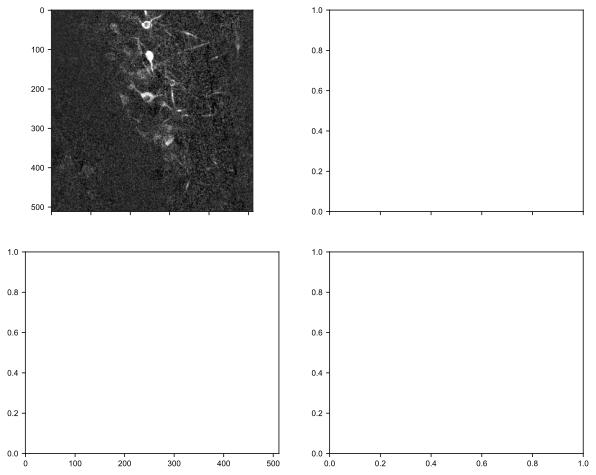

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 2,figsize=[10, 8],sharex ='col')
ax = axs.flatten('C')

ax[0].imshow(Pat1_avg-Pat1_baseline,cmap='gray',vmin=-10,vmax=50)
maskim = np.sum(Pat_Masks[:,:,],axis=2)
ax[0].imshow(maskim,alpha=0.5*maskim/np.max(maskim), cmap='Reds')
ax[1].imshow(Pat2_avg-Pat2_baseline,cmap='gray',vmin=-10,vmax=50)
ax[1].imshow(maskim,alpha=0.5*maskim/np.max(maskim), cmap='Reds')
ax[2].imshow(Pat3_avg-Pat3_baseline,cmap='gray',vmin=-10,vmax=50)
im = ax[3].imshow(Pat4_avg-Pat4_baseline,cmap='gray',vmin=-10,vmax=50)
maskim = np.sum(Pat_Masks,axis=2)
ax[3].imshow(maskim,alpha=0.5*maskim/np.max(maskim), cmap='Reds')
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)

In [8]:
roi_masks = np.resize(Pat_Masks,[512*512,19])
res_pat1 = np.dot(np.resize(Pat1,[121,512*512]),roi_masks)
res_pat1 = np.delete(res_pat1,45,axis=0)

In [9]:
Pat1 = np.delete(Pat1,45,axis=0)
Pat1_filtered = mk.Kalman_Stack_Filter(Pat1,gain=0.5)
res_pat1 = np.dot(np.resize(Pat1_filtered,[121,512*512]),roi_masks)
res_pat1_baseline = np.mean(res_pat1[13:43,:],axis=0)

Pat2 = np.delete(Pat2,45,axis=0)
Pat2_filtered = mk.Kalman_Stack_Filter(Pat2,gain=0.5)
res_pat2 = np.dot(np.resize(Pat2_filtered,[121,512*512]),roi_masks)
res_pat2_baseline = np.mean(res_pat2[13:43,:],axis=0)

Pat3= np.delete(Pat3,45,axis=0)
Pat3_filtered = mk.Kalman_Stack_Filter(Pat3,gain=0.5)
res_pat3 = np.dot(np.resize(Pat3_filtered,[121,512*512]),roi_masks)
res_pat3_baseline = np.mean(res_pat3[13:43,:],axis=0)

Pat4= np.delete(Pat4,45,axis=0)
Pat4_filtered = mk.Kalman_Stack_Filter(Pat4,gain=0.5)
res_pat4 = np.dot(np.resize(Pat4_filtered,[121,512*512]),roi_masks)
res_pat4_baseline = np.mean(res_pat4[13:43,:],axis=0)




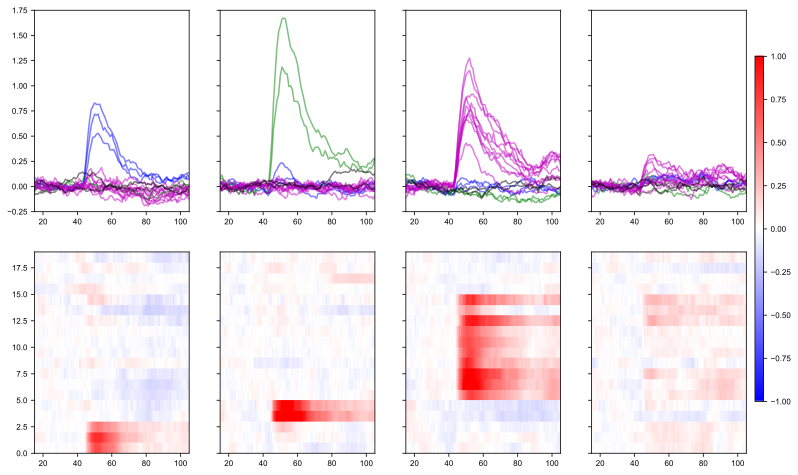

In [10]:
fig, axs = plt.subplots(nrows = 2, ncols = 4,figsize=[12, 8],sharey ='row',sharex ='row')
ax = axs.flatten('C')
color_ = ['b','b','b','g','g'] + ['m']*10 + ['k']*4
#color_ = ['k']*19
alpha_ = [0.5]*4 + [0.5]+ [0.5]*2 + [0.5]*10

norm_cmap = mlcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.0)
for i in range(17):
    ax[0].plot((res_pat1[:,i]-res_pat1_baseline[i])/res_pat1_baseline[i],color=color_[i],alpha = alpha_[i],lw=1.5)
    ax[0].set_xlim(15,105)
    ax[1].plot((res_pat3[:,i]-res_pat3_baseline[i])/res_pat3_baseline[i],color=color_[i],alpha = alpha_[i],lw=1.5)
    ax[1].set_xlim(15,105)
    ax[2].plot((res_pat4[:,i]-res_pat4_baseline[i])/res_pat4_baseline[i],color=color_[i],alpha = alpha_[i],lw=1.5)
    ax[2].set_xlim(15,105)
    ax[3].plot((res_pat2[:,i]-res_pat2_baseline[i])/res_pat2_baseline[i],color=color_[i],alpha = alpha_[i],lw=1.5)
    ax[3].set_xlim(15,105)
    ax[3].set_ylim(-0.25,1.75)
ax[4].pcolorfast(((res_pat1-res_pat1_baseline)/res_pat1_baseline).T,cmap='bwr',norm=norm_cmap)
ax[5].pcolorfast(((res_pat3-res_pat3_baseline)/res_pat3_baseline).T,cmap='bwr',norm=norm_cmap)
ax[6].pcolorfast(((res_pat4-res_pat4_baseline)/res_pat4_baseline).T,cmap='bwr',norm=norm_cmap)
im =ax[7].pcolorfast(((res_pat2-res_pat2_baseline)/res_pat2_baseline).T,cmap='bwr',norm=norm_cmap)
ax[4].set_xlim(15,105)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.2, 0.01, 0.6])
fig.colorbar(im, cax=cbar_ax)
#pconf.save_fig("Fig1_StimResult_20mW",tight_layout=False, Imagespath = IMAGES_PATH)
